<a href="https://colab.research.google.com/github/Msutinee/EDA-Python-project/blob/main/Capstone_3_Sutinee_McGee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Impact of Mother's Education Level and Age on Newborn Weight

**Introduction**

This notebook presents an analysis of a dataset comprising birth rates and related data across the 50 states and DC from 2016 to 2021. The dataset, sourced from the Centers for Disease Control and Prevention (CDC), provides comprehensive information including the number of births, gender distribution, birth weight, state of delivery, and year of delivery. By examining this dataset, we aim to uncover trends, patterns, and insights regarding birth rates and characteristics across different geographic locations and time periods. The analysis will contribute to a better understanding of factors influencing birth outcomes and facilitate evidence-based decision-making in maternal and child health.

Dataset from [Kiggle](https://www.kaggle.com/datasets/danbraswell/temporary-us-births)

**Dataset**
*   **State** : state name in full (includes District of Columbia)
*   **State Abbreviation** : 2-character state abbreviation
*   **Year** : 4-digit year
*   **Gender** : Gender of baby
*   **Education Level of Mother** :
        - Code 1 : 8th grade or less
        - Code 2 : 9th through 12th grade with no diploma
        - Code 3 : High school graduate or GED completed
        - Code 4 : Some college credit, but not a degree
        - Code 5 : Associate degree (AA, AS)
        - Code 6 : Bachelor's degree (BA, AB, BS)
        - Code 7 : Master's degree (MA, MS, MEng, MEd, MSW, MBA)
        - Code 8 : Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)
        - Code -9 : Unknown or Not Stated
*   **Education Level Code** : Codes for the education levels 1..8, plus -9 for unknown level
*   **Number of Births** : Number of births for the category
*   **Average Age of Mother (years)** : Mother's average age in the category
*   **Average Birth Weight (g)** : Average birth weight in the category

# Importing Required Libraries

In [1]:
# import & alias modules
import math
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# Import data from Googledrive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Reading Dataset

In [3]:
#Create a DataFrame
birth_df = pd.read_csv('/content/gdrive/My Drive/us_births_2016_2021.csv')

# Data Exploration

In [4]:
#Explore data
birth_df.shape #(5496,9)
birth_df.info()
birth_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          5496 non-null   object 
 1   State Abbreviation             5496 non-null   object 
 2   Year                           5496 non-null   int64  
 3   Gender                         5496 non-null   object 
 4   Education Level of Mother      5496 non-null   object 
 5   Education Level Code           5496 non-null   int64  
 6   Number of Births               5496 non-null   int64  
 7   Average Age of Mother (years)  5496 non-null   float64
 8   Average Birth Weight (g)       5496 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 386.6+ KB


,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [5]:
#Check NuLL value
birth_df.isnull().sum()

State                            0
State Abbreviation               0
Year                             0
Gender                           0
Education Level of Mother        0
Education Level Code             0
Number of Births                 0
Average Age of Mother (years)    0
Average Birth Weight (g)         0
dtype: int64

In [6]:
#Check some statistic
birth_df[['Number of Births','Average Age of Mother (years)', 'Average Birth Weight (g)']].describe().round(2)

,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
count,5496.00,5496.00,5496.00
mean,4115.44,29.55,3250.89
std,6687.04,2.78,114.46
min,10.00,23.10,2451.90
25%,559.00,27.50,3182.20
50%,1692.00,29.60,3256.00
75%,5140.00,31.80,3330.82
max,59967.00,35.50,3585.70


# Exploratory Data Analysis(EDA)

1. What are the birth rates between 2016 and 2021?
2. What is the relationship between mother's age and birth's rates?
3. Does the age of the mother correlate with the baby's birth weight?
4. What is the relationship between mother's education level and baby birth rates?
5. What is the relationship between mother's education level and baby birth weight?
6. Does a mother having an associate's or higher degree affect the newborn weight?
7. What is the average newborn weight?
8. Which are the top 5 states with the highest and lowest birth rates between 2016 and 2021?

# 1. What are the birth rates between 2016 and 2021?

In [7]:
birthrate_years = birth_df.groupby('Year')['Number of Births'].sum().reset_index()
#birthrate_years = birthrate_years.sort_values(by = 'Number of Births', ascending=False)
birthrate_years.head(10)

,Year,Number of Births
0,2016,3945853
1,2017,3855479
2,2018,3791707
3,2019,3747531
4,2020,3613633
5,2021,3664277


<Axes: xlabel='Year', ylabel='Number of Births'>

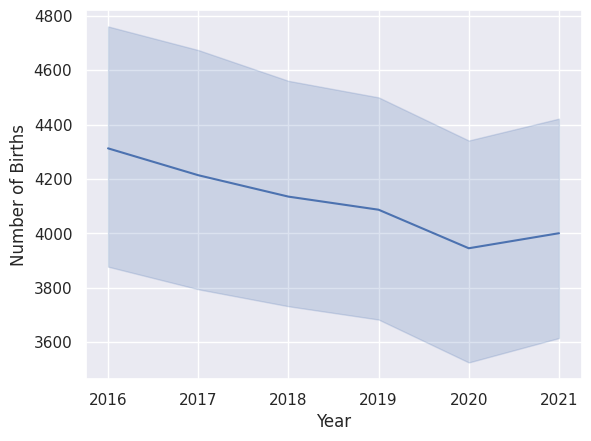

In [8]:
sns.lineplot(x='Year', y = 'Number of Births', data=birth_df)

<Axes: xlabel='Year', ylabel='Average Age of Mother (years)'>

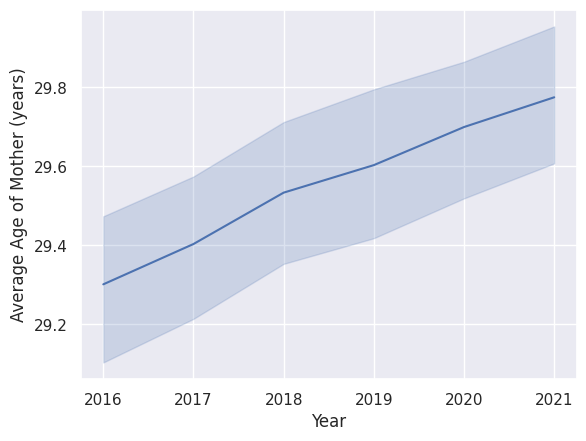

In [9]:
sns.lineplot(x='Year', y = 'Average Age of Mother (years)', data=birth_df)

The number of babies being born in the United States has been going down since 2016. In 2020, there was a small increase, but in general, the trend has been going down. On average, mothers in the United States are about 29 years old when they have a baby.

#2. What is the relationship between mother's age and birth's rates?





<Axes: xlabel='Average Age of Mother (years)', ylabel='Number of Births'>

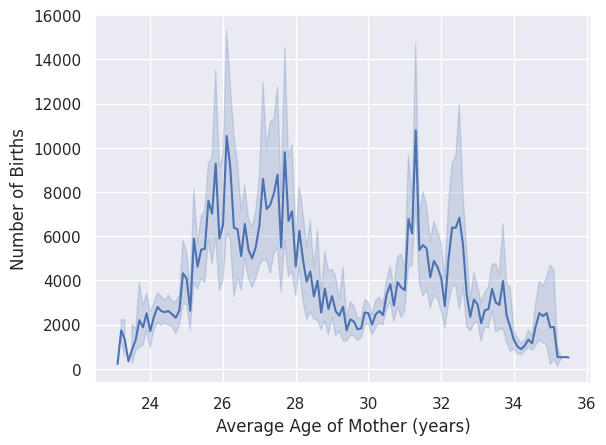

In [10]:
sns.lineplot(x='Average Age of Mother (years)',y='Number of Births',data = birth_df)

The birth rate in the USA is closely related to the age of mothers. The largest number of women tend to become mothers between the ages of 26 and 31, indicating a notable correlation between mother's age and birth rates.

#3. Does the age of the mother correlate with the baby's birth weight?

In [11]:
#Check statistic
birth_df[['Number of Births','Average Age of Mother (years)', 'Average Birth Weight (g)']].describe().round(2)

,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
count,5496.00,5496.00,5496.00
mean,4115.44,29.55,3250.89
std,6687.04,2.78,114.46
min,10.00,23.10,2451.90
25%,559.00,27.50,3182.20
50%,1692.00,29.60,3256.00
75%,5140.00,31.80,3330.82
max,59967.00,35.50,3585.70


In [12]:
#From the statistic check, are there correlations between 'Average Age of Mother'columns and 'Average Birth Weight '?
birth_df['Average Age of Mother (years)'].corr(birth_df['Average Birth Weight (g)'])

0.4420694136695038

The correlation coefficient of 0.44 shows that there is a moderate positive connection between the average age of mothers and the average birth weight. This means that when the average age of mothers goes up, there is a tendency for the average birth weight to be higher.

In [13]:
#check the significance of correlation by using pearsonr
stats.pearsonr(birth_df['Average Age of Mother (years)'], birth_df['Average Birth Weight (g)'])

PearsonRResult(statistic=0.4420694136695038, pvalue=9.481695461042566e-262)

The p-value is less then 0.05.

There is a statistically significant between Average Age of Mother (years) and Average Birth Weight (g).

<Axes: xlabel='Average Age of Mother (years)', ylabel='Average Birth Weight (g)'>

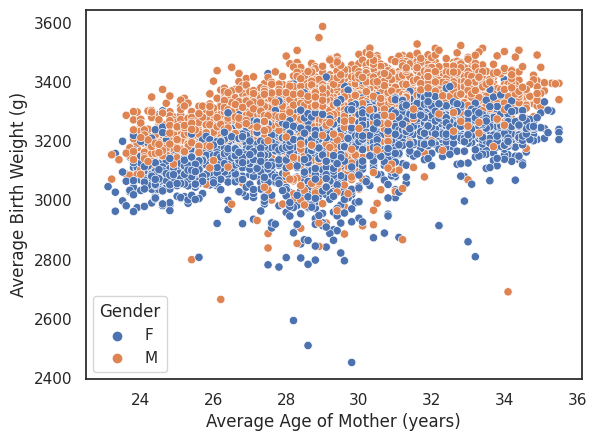

In [14]:
sns.set_style("white")
sns.scatterplot(x='Average Age of Mother (years)', y='Average Birth Weight (g)',hue="Gender", data= birth_df)

The age of the mother is found to have a moderate positive correlation with the baby's birth weight, as indicated by a correlation coefficient of 0.44. This means that when the average age of mothers increases, there is a tendency for the average birth weight of babies to be higher.

Moreover, the statistical analysis reveals that there is a significant relationship between the average age of mothers and the average birth weight, as the p-value is less than 0.05.

Additionally, based on the visualization, it appears that male newborns tend to have a higher average birth weight.

# 4. What is the relationship between women's education level and baby birth rates?

In [15]:
#check sum of newborn on each mother's education and sort by high to low education
pivot_edu = birth_df.groupby('Education Level of Mother')['Number of Births'].sum().reset_index()
pivot_edu = pivot_edu.sort_values(by = 'Number of Births', ascending=False)
pivot_edu.head(10)

,Education Level of Mother,Number of Births
5,High school graduate or GED completed,5775918
3,"Bachelor's degree (BA, AB, BS)",4653184
7,"Some college credit, but not a degree",4425269
6,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",2161046
1,9th through 12th grade with no diploma,2086382
2,"Associate degree (AA, AS)",1867700
0,8th grade or less,708850
4,"Doctorate (PhD, EdD) or Professional Degree (M...",627705
8,Unknown or Not Stated,312426


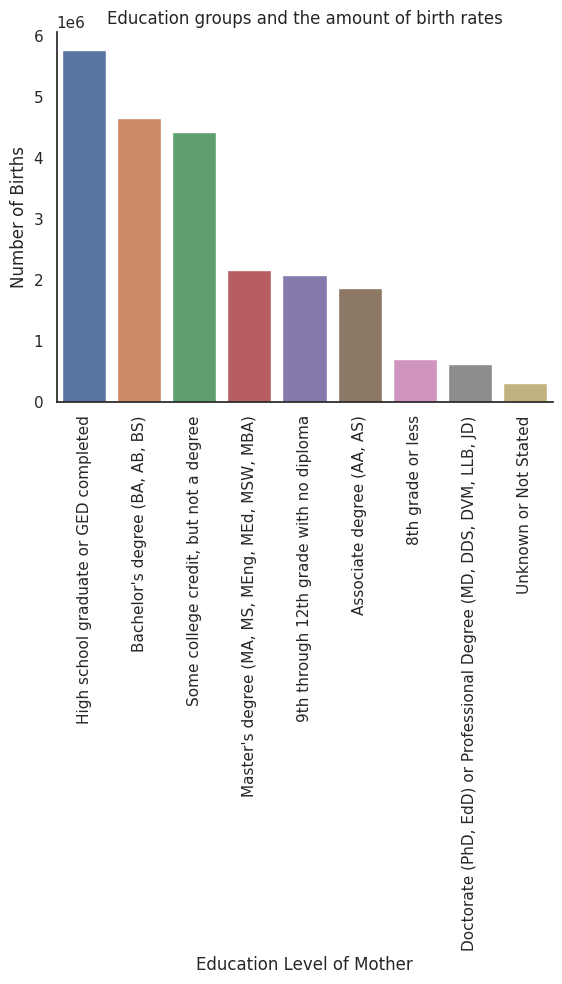

In [16]:
edu_chart = sns.barplot(x='Education Level of Mother', y='Number of Births', data = pivot_edu)
edu_chart.set_xticklabels(edu_chart.get_xticklabels(), rotation = 90)
sns.despine()
edu_chart.set_title('Education groups and the amount of birth rates')
plt.show(edu_chart)


The relationship between women's education level and baby birth rates reveals that the highest birth rate is observed among mothers who have completed high school or earned a GED (General Educational Development) certificate. The second-highest birth rate is found among mothers with a bachelor's degree, followed by mothers who have completed some college credits but do not hold a degree.

# 5. What is the relationship between women's education level and baby birth weight?

In [17]:
#Check Avg Birth Weight by Mother's Education Level

edu_weight = birth_df.groupby('Education Level of Mother')['Average Birth Weight (g)'].mean().reset_index().round(2)
edu_weight = edu_weight.sort_values(by = 'Average Birth Weight (g)', ascending=False)
edu_weight.head(10)

,Education Level of Mother,Average Birth Weight (g)
3,"Bachelor's degree (BA, AB, BS)",3334.92
6,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",3328.03
4,"Doctorate (PhD, EdD) or Professional Degree (M...",3303.87
2,"Associate degree (AA, AS)",3289.47
7,"Some college credit, but not a degree",3256.78
0,8th grade or less,3249.86
5,High school graduate or GED completed,3214.30
1,9th through 12th grade with no diploma,3158.51
8,Unknown or Not Stated,3119.69


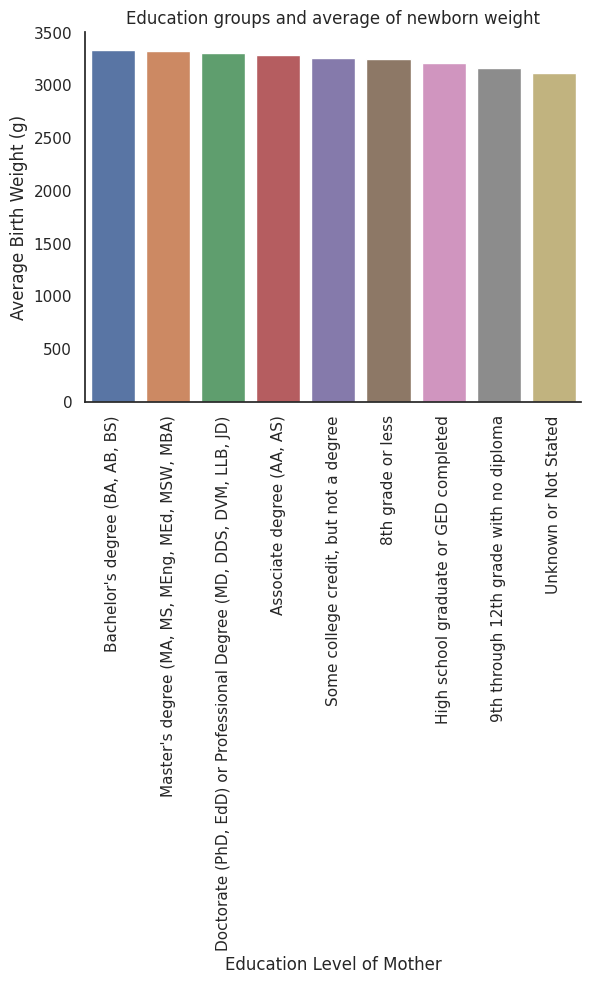

In [18]:
edu_weight_chart = sns.barplot(x='Education Level of Mother', y='Average Birth Weight (g)', data = edu_weight)
edu_weight_chart.set_xticklabels(edu_weight_chart.get_xticklabels(), rotation = 90)
sns.despine()
edu_weight_chart.set_title('Education groups and average of newborn weight')
plt.show(edu_chart)

Please note that the weight differences mentioned below are quite small. Based on the visualization, there is a relationship between the education level of women and the average birth weight of babies.
The highest average newborn weight is observed among mothers with a bachelor's degree, followed by mothers with a master's degree. The third highest average newborn weight is found among mothers with a PhD, and the fourth highest average newborn weight is seen among mothers with an associate degree.



# 6. Does the associated & higher education *affect* the newborn weight?

**Hypotheses**

Influence of women with an associate's degree & higher education on the average birth weight from 2016 to 2021

*   H0: women with an associate's degree & higher education has no effect on the average birth weight

*   HA: women with an associate's degree & higher education has effect on the average birth weight

<Axes: xlabel='Average Birth Weight (g)', ylabel='Count'>

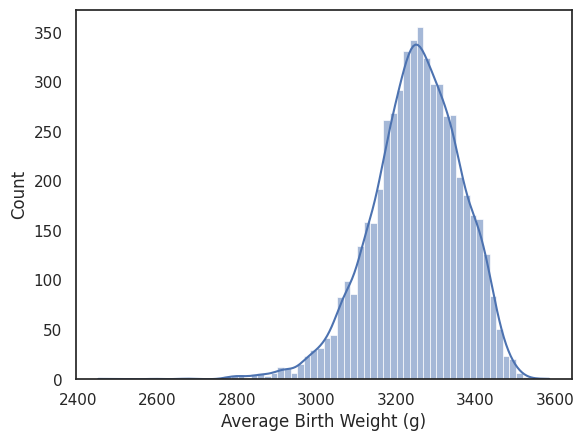

In [19]:
#Check if the variable(newborn weight) is normal distribute
sns.histplot(birth_df['Average Birth Weight (g)'], kde = True)

In [20]:
#create a new table contain the women who have education less than associate degree. considered no degree
noasso_filter = (birth_df['Education Level Code']  >= 1) & (birth_df['Education Level Code'] <= 4)
no_degree = birth_df.iloc[noasso_filter.values]
no_degree.info()
no_degree.shape #(2448,9)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 0 to 5490
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          2448 non-null   object 
 1   State Abbreviation             2448 non-null   object 
 2   Year                           2448 non-null   int64  
 3   Gender                         2448 non-null   object 
 4   Education Level of Mother      2448 non-null   object 
 5   Education Level Code           2448 non-null   int64  
 6   Number of Births               2448 non-null   int64  
 7   Average Age of Mother (years)  2448 non-null   float64
 8   Average Birth Weight (g)       2448 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 191.2+ KB


(2448, 9)

In [21]:
#Check the values in women with have less than associate degree.
pivot_nodegree = no_degree.groupby('Education Level of Mother')['Number of Births'].sum().reset_index()
pivot_nodegree = pivot_nodegree.sort_values(by = 'Number of Births', ascending=False)
pivot_nodegree.head(10)

,Education Level of Mother,Number of Births
2,High school graduate or GED completed,5775918
3,"Some college credit, but not a degree",4425269
1,9th through 12th grade with no diploma,2086382
0,8th grade or less,708850


In [22]:
#create a new table contain the women who have associate and higher degree. Considered have degree
assoandhigher_filter = (birth_df['Education Level Code']  >= 5) & (birth_df['Education Level Code'] <= 8)
have_degree =  birth_df.iloc[assoandhigher_filter.values]
have_degree.info()
have_degree.shape #(2448,9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 4 to 5494
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          2448 non-null   object 
 1   State Abbreviation             2448 non-null   object 
 2   Year                           2448 non-null   int64  
 3   Gender                         2448 non-null   object 
 4   Education Level of Mother      2448 non-null   object 
 5   Education Level Code           2448 non-null   int64  
 6   Number of Births               2448 non-null   int64  
 7   Average Age of Mother (years)  2448 non-null   float64
 8   Average Birth Weight (g)       2448 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 191.2+ KB


(2448, 9)

In [23]:
#Check the values in womenwho have associate and higher degree
pivot_havedegree = have_degree.groupby('Education Level of Mother')['Number of Births'].sum().reset_index()
pivot_havedegree = pivot_havedegree.sort_values(by = 'Number of Births', ascending=False)
pivot_havedegree.head(10)

,Education Level of Mother,Number of Births
1,"Bachelor's degree (BA, AB, BS)",4653184
3,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",2161046
0,"Associate degree (AA, AS)",1867700
2,"Doctorate (PhD, EdD) or Professional Degree (M...",627705


There is 2448 Average Birth Weight rows from the women who have associated & higher degree and without it. T-test will compare the means of these two simples

In [24]:
# T-test between the women who have associated & higher degree and without it.
stats.ttest_ind(have_degree['Average Birth Weight (g)'], no_degree['Average Birth Weight (g)'])

Ttest_indResult(statistic=37.74321984319636, pvalue=7.533952552583285e-274)

There is a difference of 37.7 standard deviations between these two means. The p-value is extreamly small which means this is a real difference. The birth weight has affected by mother's education between the women who the women who have associated & higher degree and without it.

 There is a statistically significant difference in the newborn weights between the women who have associated & higher degree and without it.

In [25]:
#Calculate the standard error and compute the confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(have_degree['Average Birth Weight (g)'], no_degree['Average Birth Weight (g)'])

'The difference in means at the 95% confidence interval (two-tail) is between -99.10068750160897 and -89.31622426309715.'

After conducting the statistical analysis, we can reject the null hypothesis. There is a substantial difference of 37.7 standard deviations between the means of newborn weights for women with associated and higher degrees compared to those without such degrees. The p-value obtained is extremely small, indicating a significant and real difference.

The birth weight of newborns is influenced by the mother's education level, particularly among women who have associated and higher degrees compared to those without such degrees. This difference is statistically significant. With 95% confidence, the women who has less than associate degree give the baby birth weight between 99 grams and 89 grams less then then women who has associate or higher degree.


# 7. What is the average newborn weight?

In [26]:
# Total of newborn in 2016-2021
birth_df['Number of Births'].sum()

22618480

In [27]:
#Number of baby female and male births
#filter gender
female_filter = birth_df['Gender'] == 'F'
male_filter = birth_df['Gender'] == 'M'

#female newborn
female_birthrate = birth_df.iloc[female_filter.values]
print('Number female births is ' + str(female_birthrate['Number of Births'].sum().round(2)))

#male newborn
male_birthrate = birth_df.iloc[male_filter.values]
print('Number male births is ' + str(male_birthrate['Number of Births'].sum().round(2)))

Number female births is 11050314
Number male births is 11568166


In [28]:
#female newborn
female_weight = birth_df.iloc[female_filter.values]
print('The average weight for the female baby is ' + str(female_weight['Average Birth Weight (g)'].mean().round(2)) + ' grams')

#male newborn
male_weight = birth_df.iloc[male_filter.values]
print('The average weight for the male baby is ' + str(male_weight['Average Birth Weight (g)'].mean().round(2)) + ' grams')


The average weight for the female baby is 3194.58 grams
The average weight for the male baby is 3307.16 grams


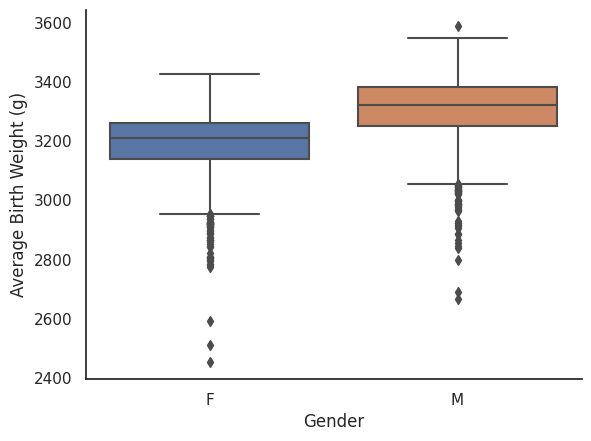

In [29]:
sns.boxplot(y= 'Average Birth Weight (g)', x = 'Gender', data = birth_df)
sns.despine()


From 2016 to 2021, when we looked at the birth rates and data from all the states and Washington D.C., we found that there were a total of 22,618,480 newborns. Out of these, 11,050,314 were girls and 11,568,166 were boys. On average, the girls weighed around 3,194.58 grams, while the boys weighed around 3,307.16 grams at birth.

# 8. Which are the top 5 states with the highest and lowest birth rates between 2016 and 2021?

In [30]:
#Top 5 state higest birth's rate
state_birthrate = birth_df.groupby('State')['Number of Births'].sum().reset_index()
state_birthrate_top5 = state_birthrate.sort_values(by = 'Number of Births', ascending=False)
state_birthrate_top5.head(5)

,State,Number of Births
4,California,2702751
43,Texas,2278104
32,New York,1331877
9,Florida,1316127
13,Illinois,854265


In [31]:
#Top 5 state lowest birth's rate
state_birthrate_low5 = state_birthrate.sort_values(by = 'Number of Births', ascending=True)
state_birthrate_low5.head(5)

,State,Number of Births
45,Vermont,32721
50,Wyoming,39781
8,District of Columbia,55243
1,Alaska,60398
39,Rhode Island,62682


The top 5 states with the highest birth rates between 2016 and 2021 are California, Texas, New York, Florida, and Illinois.

On the other hand, the top 5 states with the lowest birth rates during the same period are Vermont, Wyoming, District of Columbia, Alaska, and Rhode Island.

# Summary


*   The US has seen a decline in births since 2016, with a slight increase in 2020. The average age of mothers at birth is around 29 years.

*   Mothers aged 26-31 have the highest birth rates, indicating a correlation between age and likelihood of giving birth.

*   Average birth weight tends to increase with the mother's age, with a moderate positive correlation of 0.44 which means As the average age of mothers goes up, babies tend to have higher average birth weights
*   The highest birth rate is observed among mothers with high school graduates, 2nd bachelor's degree and 3nd who have completed some college credits but do not hold a degree.
*   Among different education levels, mothers with bachelor's degrees have the highest average newborn weight
*   Statistical analysis shows a significant difference in newborn weights between women with associated and higher degrees compared to those without.
*   From 2016 to 2021, there were 22.6 million newborns in the US, with average weights of 3,194.58g for girls and 3,307.16g for boys.
*   California, Texas, New York, Florida, and Illinois had the highest birth rates, while Vermont, Wyoming, District of Columbia, Alaska, and Rhode Island had the lowest.
*   Understanding these factors can guide policies and interventions to improve maternal and child health.



# Some questions/thoughts for other projects
*   Does the mother's education level have an impact on the likelihood of underweight newborns?
*   Which state has the highest proportion of mothers with associate & higher degree?

